### Prepare Data and Evaluate the Results

Now we have had a closer look at the data, we need to clean it, and create functions to get data by ethnicity or gender.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df18 = pd.read_csv('./survey_results_public18.csv', low_memory=False)
df18.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [2]:
df19 = pd.read_csv('./survey_results_public19.csv', low_memory=False)
df19.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
df20 = pd.read_csv('./survey_results_public20.csv', low_memory=False)
df20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


First we will be handling just with respondents of US, that answer about ethnicity, gender, employment and job seeking status. Job satisfaction and annual salary cannot be used as a mandatory field, because who is not working, probably not answer this fields.

In [4]:
sample18 = df18.query('Country == "United States" & RaceEthnicity == RaceEthnicity & Gender == Gender & JobSearchStatus == JobSearchStatus & Employment == Employment')
sample19 = df19.query('Country == "United States" & Ethnicity == Ethnicity & Gender == Gender & JobSeek == JobSeek & Employment == Employment')
sample20 = df20.query('Country == "United States" & Ethnicity == Ethnicity & Gender == Gender & JobSeek == JobSeek & Employment == Employment')

print('Total clean sample 2018: %s'%sample18.shape[0])
print('Total clean sample 2019: %s'%sample19.shape[0])
print('Total clean sample 2020: %s'%sample20.shape[0])

Total clean sample 2018: 14252
Total clean sample 2019: 17471
Total clean sample 2020: 9402


Below, we have the function used in data understanding to extract the list of possible values used in a column.

In [5]:
def extract_feature_list(column):
    '''
    INPUT 
        column - a dataframe series
        
    OUTPUT
        return - a list of possible values to a given column
    '''
    attr_set = set()
    for row in column:
        if type(row) == str:
            attr_itens = row.split(';')
            for item in attr_itens:
                # Removing special characters which cause error on filter df
                scaped_item = item.replace('(', '\(').replace(')', '\)')
                attr_set.add(scaped_item)
                
    return list(attr_set)

### Question 1: How diverse are tech workforce in the US?
In order to understand more about how diversy are the US tech workforce, it's necessary understand distribution by ethnicity and gender.

All questions we have, will be answered from ***ethnicity*** or ***gender***. To do this more easily, we can adapt the function created in data understanding (distribution_by_feature), to always provide a filtered dataset by gender or ethnicity and pass this dataset to a callback function to do some extraction, preparing the data to evaluate the results.

In [6]:
def findings_by_feature(years_df, feature, years_feature, label, func):
    '''
    INPUT 
        years_df - a dict with dataframes for each one of the study years;
        feature - a dict with strings representing the feature name of column study for each one of 
                   the study years;
                  Example: 2018 dataset use JobSatisfaction, whereas 2019 and 2020 dataset use JobSat 
        years_feature - a dict with each possible values for a given column setted above;
                        * The values can assume differente string to say the same think accros the years;
        label - a string representing name used to group the "feature";
        func - a callback function to return the value represented by some calculation made in this function;
    OUTPUT
        return - a dataframe containing values represented some statistic calculated in "func" by each possible 
                 values setted in years_feature;
    '''
    years = list(years_df.keys())
    minorities = years_feature.keys()
    data = []
    
    for item in minorities:
        row = []
        
        for year in years:
            num = np.nan
            df = years_df[year]
            feature_name = feature[year]
            
            if years_feature[item][year]:
                num = func(df[df[feature_name].str.contains(years_feature[item][year])], year, feature_name)
                            
            row.append(num)
            
        last_year = years[-1]
        row.insert(0, years_feature[item][last_year])
        data.append(row)
        
    years.insert(0, label)
    new_df = pd.DataFrame(data, columns=years)
    new_df = new_df.set_index(label)
    new_df.sort_values(by=years[-1], ascending=False)
    return new_df

Now let's cerate the callback function to get the distribution by ethnicity and gender.

In [7]:
def get_distribution_by_years(df, year, feature):
    '''
    Callback function to findings_by_minority
    
    INPUT 
        df - a dataframe of specific year, result of a previous query
        year - year of the dataframe
        minority - type of minority (Ethnicity | Gender)
        
    OUTPUT
        return - proportion of a specific group (Ethnicity | Gender), in the US for a specific year
     '''
    
    query_by_country = 'Country == "United States"'
    
    if year == 2018:
        df_18 = df18.query(query_by_country)
        return df.shape[0]/sample18[feature].count()

    elif year == 2019:
        df_19 = df19.query(query_by_country)
        return df.shape[0]/sample19[feature].count()
    
    elif year == 2020:
        df_20 = df20.query(query_by_country)
        return df.shape[0]/sample20[feature].count()
    
    return np.nan

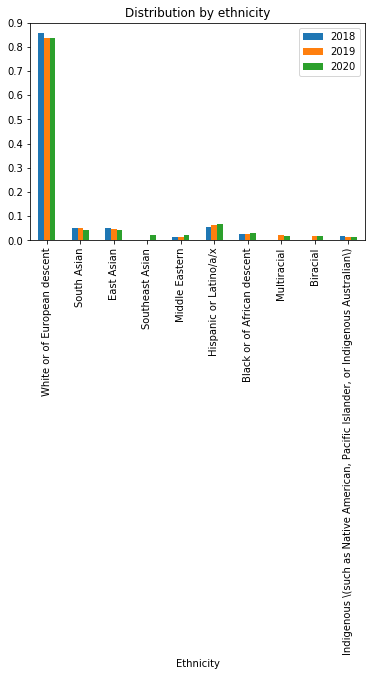

In [8]:
df_list = {2018: sample18, 2019: sample19, 2020: sample20}
feature = {2018: 'RaceEthnicity', 2019: 'Ethnicity', 2020: 'Ethnicity'}
ethnicity_list = {
    'White': {2018: 'White or of European descent', 2019: 'White or of European descent', 2020: 'White or of European descent'},
    'South': {2018: 'South Asian', 2019: 'South Asian', 2020: 'South Asian'},
    'East': {2018: 'East Asian', 2019: 'East Asian', 2020: 'East Asian'},
    'Southeast': {2018: None, 2019: None, 2020: 'Southeast Asian'},
    'Middle': {2018: 'Middle Eastern', 2019: 'Middle Eastern', 2020: 'Middle Eastern'},
    'Hispanic': {2018: 'Hispanic or Latino/Latina', 2019: 'Hispanic or Latino/Latina', 2020: 'Hispanic or Latino/a/x'},
    'Black': {2018: 'Black or of African descent', 2019: 'Black or of African descent', 2020: 'Black or of African descent'},
    'Multiracial': {2018: None, 2019: 'Multiracial', 2020: 'Multiracial'},
    'Biracial': {2018: None, 2019: 'Biracial', 2020: 'Biracial'},
    'Native': {2018: 'Native American, Pacific Islander, or Indigenous Australian', 2019: 'Native American, Pacific Islander, or Indigenous Australian', 2020: 'Indigenous \(such as Native American, Pacific Islander, or Indigenous Australian\)'}   
}

ethnicities = findings_by_feature(df_list, feature, ethnicity_list, 'Ethnicity', get_distribution_by_years)
ethnicities.plot(kind='bar', title='Distribution by ethnicity')

In [9]:
ethnicities

,2018,2019,2020
Ethnicity,,,
White or of European descent,0.855459,0.837960,0.835141
South Asian,0.051642,0.052315,0.041587
East Asian,0.050870,0.048194,0.043076
Southeast Asian,NaN,NaN,0.022123
Middle Eastern,0.014594,0.016141,0.020634
Hispanic or Latino/a/x,0.053396,0.062790,0.067858
Black or of African descent,0.024488,0.028161,0.030206
Multiracial,NaN,0.023353,0.018294
Biracial,NaN,0.017400,0.020102


What was the increase or decrease comparing 2020 to 2018 in ethnicity?

In [10]:
(ethnicities[2020]-ethnicities[2018])*100

Ethnicity
White or of European descent                                                         -2.031742
South Asian                                                                          -1.005498
East Asian                                                                           -0.779411
Southeast Asian                                                                            NaN
Middle Eastern                                                                        0.603946
Hispanic or Latino/a/x                                                                1.446189
Black or of African descent                                                           0.571855
Multiracial                                                                                NaN
Biracial                                                                                   NaN
Indigenous \(such as Native American, Pacific Islander, or Indigenous Australian\)   -0.262587
dtype: float64

In [11]:
asians = ethnicities.loc['South Asian'][2020]+ethnicities.loc['East Asian'][2020]+ethnicities.loc['Southeast Asian'][2020]
print('Total Asian proportion in 2020: %.4f'%asians)

Total Asian proportion in 2020: 0.1068


In [12]:
multi = ethnicities.loc['Multiracial'][2020]+ethnicities.loc['Biracial'][2020]
print('Total Multiracial proportion in 2020: %.4f'%multi)

Total Multiracial proportion in 2020: 0.0384


The [2019 US Census](https://www.census.gov/quickfacts/fact/dashboard/US/SEX255219#SEX255219) detected 60.1% of Non-Hispanic white people, but they were overrepresented in the tech workforce in 2020 with 85.8%, losing just 1.7 percentual points since 2018.

As well as white developers, Asian ones are overrepresented too. The Stackoverflow’s survey divides Asians in three different ethnicities being East Asian, South Asian and Southeast Asian, together in the US they sum 9.7% workforce representation in 2020. It’s little less than double identified by the 2019 US Census.

Hispanics and Latinos have increased almost one percentual point since 2018, reaching 6.3% representation in 2020 US tech workforce, which represents little more than a third of the value identified by the 2019 US Census.

Middle eastern and Black or African descent had the lowest increase between 2018 to 2020, achieving 1.7% and 2.5% respectively of the workforce. Despite the US Census accounts 13.4% of the population being Black or African descent and Middle eastern was not covered by the 2019 US Census.
 
Multiracial and Native American seem to have the most proportional representation in the US tech workforce. Stackoverflow surveys started counting Biracial and Multiracial just in 2019 separately, and in 2020 together they achieved 3.5% of the developers representation, against 2.8% of Multiracial detected by the US Census. 

Native American ethnicity is divided by two in the 2019 US Census as Native Hawaiian and American Indian, together they sum 1.5% of US population representation. Curiously, they had the same representation in 2018 US tech workforce, losing 0.19% of representation in the two subsequent years.

How are the tech workforce distributed by gender in the last years?

In [13]:
feature = {2018: 'Gender', 2019: 'Gender', 2020: 'Gender'}
gender_list = {
    'Man': {2018: 'Male', 2019: 'Man', 2020: 'Man'},
    'Woman': {2018: 'Female', 2019: 'Woman', 2020: 'Woman'},
    'Non-binary': {2018: 'Non-binary, genderqueer, or gender non-conforming', 2019: 'Non-binary, genderqueer, or gender non-conforming', 2020: 'Non-binary, genderqueer, or gender non-conforming'},
    'Transgender': {2018: 'Transgender', 2019: None, 2020: None}
}

genres = findings_by_feature(df_list, feature, gender_list, 'Gender', get_distribution_by_years)
genres

,2018,2019,2020
Gender,,,
Man,0.899032,0.880946,0.880132
Woman,0.091145,0.109610,0.109126
"Non-binary, genderqueer, or gender non-conforming",0.013963,0.017515,0.020102
NaN,0.011788,NaN,NaN


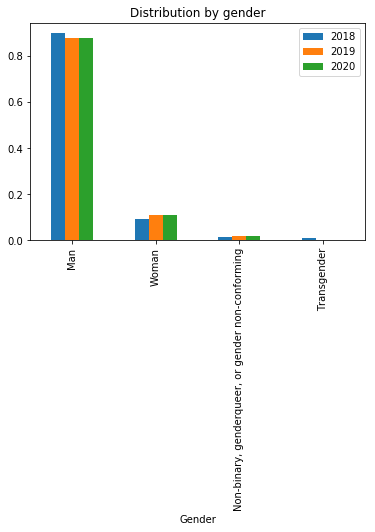

In [14]:
genres = genres.rename(index={None: 'Transgender'})
genres.plot(kind='bar', title='Distribution by gender')

In [15]:
genres

,2018,2019,2020
Gender,,,
Man,0.899032,0.880946,0.880132
Woman,0.091145,0.109610,0.109126
"Non-binary, genderqueer, or gender non-conforming",0.013963,0.017515,0.020102
Transgender,0.011788,NaN,NaN


What was the increase or decrease comparing 2020 to 2018 in gender?

In [16]:
(genres[2020]-genres[2018])*100

Gender
Man                                                 -1.889983
Woman                                                1.798062
Non-binary, genderqueer, or gender non-conforming    0.613915
Transgender                                               NaN
dtype: float64

According to the 2019 US Census, it’s possible to assume that minorities in the US tech workforce are ***Hispanics or Latinos***, ***Middle eastern*** and ***Black or African descent*** by ethnicity and ***Women*** and ***Non-binary or non-conforming*** by gender.

This study will not consider ***Native American*** as minority in this case, to be very close to representation

### Question 2: How satisfied are minorities among their peers?
According to the above data crossing, it’s possible to assume that minorities in the US tech workforce are Hispanics or Latinos, Middle eastern and Black or African descent by ethny and Women and Non-binary or non-conforming by gender.

The 2018 Stackoverflow's survey used 7 scales of “Job Satisfaction”, whereas in the following years they used 5 scales.

How satisfied are minorities ethnicities among their peers?

To answer this question we need to create a function to crossing ethnicity and gender with the scales of job satisfaction. How 2018 have 7 scales, we will use just 2019 and 2020 dataset samples.

In [17]:
def data_crossing(df, factor1, factor_list, factor2):
    '''
    INPUT 
        df - a dataframe representing the result of a specific query;
        factor1 - a string representing the study column name;
        factor_list - a list with each possible value of study for a given column setted above;
        factor2 - a string representing the second study colum name;
                     of absolute numbers; (true by default)
    OUTPUT
        return - a dataframe containing values for a given data crossing;
                 Example: Ethnicities X Job Satisfaction
    '''
    miss_data_label = 'Not answered'
    columns = extract_feature_list(df[factor2])
    columns.append(miss_data_label)
    data = []
    
    for item in factor_list:
        minotity_df = df[df[factor1].str.contains(item)]
        sat_df = (minotity_df[factor2].value_counts()/minotity_df.shape[0]).reset_index()       
        sat_df.set_index('index', inplace=True)
        sat_df.loc[miss_data_label] = [(minotity_df.shape[0]-minotity_df[factor2].count())/minotity_df.shape[0]]
        
        row = [item]
        for column in columns:
            row.append(float(sat_df.loc[column]))
            
        data.append(row)
        
    columns.insert(0, factor1)
    new_df = pd.DataFrame(data, columns=columns)
    new_df.set_index(factor1, inplace=True)
    
    return new_df

To evaluate Job Satisfaction, we need to ensure we'll use just respondents who is currently working.

In [18]:
employment_query = 'Employment == "Employed full-time" | Employment == "Employed part-time" | Employment == "Independent contractor, freelancer, or self-employed"'                 

employed_sample19 = sample19.query(employment_query)
employed_sample20 = sample20.query(employment_query)

print('Proportion respondents working in 2019: %.4f'%(employed_sample19.shape[0]/sample19.shape[0]))
print('Proportion respondents working in 2020: %.4f'%(employed_sample20.shape[0]/sample20.shape[0]))

Proportion respondents working in 2019: 0.9592
Proportion respondents working in 2020: 0.9029


In [19]:
#Job satisfaction by minorities ethnicities 2019

ethnicity_list19 = ['White or of European descent', 'Hispanic or Latino/Latina', 'Middle Eastern', 'Black or of African descent']
minority_ethny19 = data_crossing(employed_sample19, 'Ethnicity', ethnicity_list19, 'JobSat')
minority_ethny19 = minority_ethny19[['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied', 'Very dissatisfied', 'Not answered']]
minority_ethny19

,Very satisfied,Slightly satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Very dissatisfied,Not answered
Ethnicity,,,,,,
White or of European descent,0.414607,0.301808,0.075505,0.119014,0.055234,0.033832
Hispanic or Latino/Latina,0.356031,0.312257,0.091440,0.126459,0.059339,0.054475
Middle Eastern,0.337079,0.329588,0.093633,0.112360,0.086142,0.041199
Black or of African descent,0.302832,0.322440,0.095861,0.122004,0.054466,0.102397


In [20]:
def extract_to_csv(df):
    txt = df.to_csv()
    txt = txt.replace(',', ';').replace('.', ',')
    arr = txt.split('\n')
    for item in arr:
        print(item)

In [21]:
extract_to_csv(minority_ethny19)

Ethnicity;Very satisfied;Slightly satisfied;Neither satisfied nor dissatisfied;Slightly dissatisfied;Very dissatisfied;Not answered
White or of European descent;0,41460658285068513;0,3018081649950558;0,07550501483260348;0,11901398502613364;0,055233790083345106;0,03383246221217686
Hispanic or Latino/Latina;0,3560311284046693;0,3122568093385214;0,0914396887159533;0,1264591439688716;0,05933852140077821;0,054474708171206226
Middle Eastern;0,33707865168539325;0,3295880149812734;0,09363295880149813;0,11235955056179775;0,08614232209737828;0,04119850187265917
Black or of African descent;0,3028322440087146;0,3224400871459695;0,09586056644880174;0,12200435729847495;0,054466230936819175;0,10239651416122005



In the column of ***Very satisfied*** we can see a great difference between ethnicities. How much is this difference?

In [22]:
for ethny in ethnicity_list19:
    diff = minority_ethny19.loc['White or of European descent']['Very satisfied'] - minority_ethny19.loc[ethny]['Very satisfied'] 
    print('Difference between White or of European descent and {}: {}'.format(ethny, diff))

Difference between White or of European descent and White or of European descent: 0.0
Difference between White or of European descent and Hispanic or Latino/Latina: 0.05857545444601586
Difference between White or of European descent and Middle Eastern: 0.07752793116529189
Difference between White or of European descent and Black or of African descent: 0.11177433884197052


In [23]:
#Job satisfaction by minorities ethnicities 2020

ethnicity_list20 = ['White or of European descent', 'Hispanic or Latino/a/x', 'Middle Eastern', 'Black or of African descent']
minority_ethny20 = data_crossing(employed_sample20, 'Ethnicity', ethnicity_list20, 'JobSat')
minority_ethny20 = minority_ethny20[['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied', 'Very dissatisfied', 'Not answered']]
minority_ethny20

,Very satisfied,Slightly satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Very dissatisfied,Not answered
Ethnicity,,,,,,
White or of European descent,0.416782,0.292720,0.079050,0.135315,0.057794,0.018338
Hispanic or Latino/a/x,0.397790,0.268877,0.104972,0.130755,0.064457,0.033149
Middle Eastern,0.357143,0.279762,0.095238,0.136905,0.095238,0.035714
Black or of African descent,0.403361,0.239496,0.075630,0.134454,0.079832,0.067227


In [24]:
extract_to_csv(minority_ethny20)

Ethnicity;Very satisfied;Slightly satisfied;Neither satisfied nor dissatisfied;Slightly dissatisfied;Very dissatisfied;Not answered
White or of European descent;0,41678243956654626;0,292720200055571;0,07904973603778827;0,13531536537927202;0,05779383161989442;0,018338427340928037
Hispanic or Latino/a/x;0,39779005524861877;0,26887661141804786;0,10497237569060773;0,13075506445672191;0,06445672191528545;0,03314917127071823
Middle Eastern;0,35714285714285715;0,27976190476190477;0,09523809523809523;0,13690476190476192;0,09523809523809523;0,03571428571428571
Black or of African descent;0,40336134453781514;0,23949579831932774;0,07563025210084033;0,13445378151260504;0,07983193277310924;0,06722689075630252



The difference seems to decrease in 2020. 

In [25]:
for ethny in ethnicity_list20:
    diff = minority_ethny20.loc['White or of European descent']['Very satisfied'] - minority_ethny20.loc[ethny]['Very satisfied'] 
    print('Difference between White or of European descent and {}: {}'.format(ethny, diff))

Difference between White or of European descent and White or of European descent: 0.0
Difference between White or of European descent and Hispanic or Latino/a/x: 0.01899238431792749
Difference between White or of European descent and Middle Eastern: 0.05963958242368911
Difference between White or of European descent and Black or of African descent: 0.013421095028731123


What is the difference to 2019 to 2020 in ***Very satisfied*** column?

In [26]:
minority_ethny19 = minority_ethny19.rename(index={'Hispanic or Latino/Latina': 'Hispanic or Latino/a/x'})
(minority_ethny20['Very satisfied']-minority_ethny19['Very satisfied'])*100

Ethnicity
White or of European descent     0.217586
Hispanic or Latino/a/x           4.175893
Middle Eastern                   2.006421
Black or of African descent     10.052910
Name: Very satisfied, dtype: float64

What is the job satisfaction distribution by each gender in 2019 and 2020?

In [27]:
#Job satisfaction by minorities genders 2019

gender_list19 = extract_feature_list(df19['Gender'])
minority_gender19 = data_crossing(employed_sample19, 'Gender', gender_list19, 'JobSat')
minority_gender19 = minority_gender19[['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied', 'Very dissatisfied', 'Not answered']]
minority_gender19

,Very satisfied,Slightly satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Very dissatisfied,Not answered
Gender,,,,,,
Man,0.396446,0.308670,0.083519,0.120819,0.055071,0.035475
"Non-binary, genderqueer, or gender non-conforming",0.313380,0.327465,0.102113,0.154930,0.077465,0.024648
Woman,0.426430,0.277068,0.060522,0.123265,0.052748,0.059967


In [28]:
extract_to_csv(minority_gender19)

Gender;Very satisfied;Slightly satisfied;Neither satisfied nor dissatisfied;Slightly dissatisfied;Very dissatisfied;Not answered
Man;0,3964457057909318;0,30866950469626325;0,08351915669977701;0,12081897425501723;0,05507128860058112;0,03547536995742956
"Non-binary; genderqueer; or gender non-conforming";0,31338028169014087;0,3274647887323944;0,10211267605633803;0,15492957746478872;0,07746478873239436;0,02464788732394366
Woman;0,4264297612437535;0,27706829539144917;0,06052193225985564;0,12326485285952249;0,05274847307051638;0,059966685174902834



The same difference can be noted in Very satisfied column.

In [29]:
for gender in gender_list19:
    diff = minority_gender19.loc['Woman']['Very satisfied'] - minority_gender19.loc[gender]['Very satisfied'] 
    print('Difference between Woman and {}: {}'.format(gender, diff))

Difference between Woman and Man: 0.02998405545282168
Difference between Woman and Non-binary, genderqueer, or gender non-conforming: 0.11304947955361261
Difference between Woman and Woman: 0.0


In [30]:
#Job satisfaction by minorities genders 2020

gender_list20 = extract_feature_list(df20['Gender'])
minority_gender20 = data_crossing(employed_sample20, 'Gender', gender_list20, 'JobSat')
minority_gender20 = minority_gender20[['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied', 'Very dissatisfied', 'Not answered']]
minority_gender20

,Very satisfied,Slightly satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Very dissatisfied,Not answered
Gender,,,,,,
Man,0.402906,0.292683,0.086365,0.137545,0.060109,0.020392
"Non-binary, genderqueer, or gender non-conforming",0.413580,0.271605,0.111111,0.129630,0.055556,0.018519
Woman,0.422819,0.281879,0.079418,0.120805,0.062640,0.032438


In [31]:
extract_to_csv(minority_gender20)

Gender;Very satisfied;Slightly satisfied;Neither satisfied nor dissatisfied;Slightly dissatisfied;Very dissatisfied;Not answered
Man;0,4029055044648807;0,2926829268292683;0,08636545381847262;0,13754498200719711;0,060109289617486336;0,02039184326269492
"Non-binary; genderqueer; or gender non-conforming";0,41358024691358025;0,2716049382716049;0,1111111111111111;0,12962962962962962;0,05555555555555555;0,018518518518518517
Woman;0,4228187919463087;0,28187919463087246;0,07941834451901567;0,12080536912751678;0,06263982102908278;0,03243847874720358



In [32]:
for gender in gender_list20:
    diff = minority_gender20.loc['Man']['Very satisfied'] - minority_gender20.loc[gender]['Very satisfied'] 
    print('Difference between Man and {}: {}'.format(gender, diff))

Difference between Man and Man: 0.0
Difference between Man and Non-binary, genderqueer, or gender non-conforming: -0.010674742448699537
Difference between Man and Woman: -0.01991328748142801


What is the difference to 2019 to 2020 in Very satisfied column for gender?

In [33]:
(minority_gender20['Very satisfied']-minority_gender19['Very satisfied'])*100

Gender
Man                                                   0.645980
Non-binary, genderqueer, or gender non-conforming    10.019997
Woman                                                -0.361097
Name: Very satisfied, dtype: float64

Stackoverflow asked developers what their job seeking status was in 2019 and 2020. So, it’s possible to find some false negatives, i.e, developers who said they  were ***very satisfied*** with their jobs and ***were actively looking for a job***. So, let's create a callback function to extract these false positives to gender and ethnicity.

In [34]:
def get_false_positive(df, year, feature):
    jobseek_query = 'JobSeek == "I am actively looking for a job"'
    false_positive = df.query(jobseek_query).shape[0]
    return false_positive/df.shape[0]

Extracting the false positives related to respondents who felt very satisfied and were actively looking for a new job by ethnicity.

In [35]:
satisfaction_query = 'JobSat == "Very satisfied"'
df_list = {2019: employed_sample19.query(satisfaction_query), 2020: employed_sample20.query(satisfaction_query)}

feature = {2019: 'Ethnicity', 2020: 'Ethnicity'}
minority_ethny_list = {
    'White': {2019: 'White or of European descent', 2020: 'White or of European descent'},
    'Middle': {2019: 'Middle Eastern', 2020: 'Middle Eastern'},
    'Hispanic': {2019: 'Hispanic or Latino/Latina', 2020: 'Hispanic or Latino/a/x'},
    'Black': {2019: 'Black or of African descent', 2020: 'Black or of African descent'},
}

fp_by_ethny = findings_by_feature(df_list, feature, minority_ethny_list, 'Ethnicity', get_false_positive)
fp_by_ethny

,2019,2020
Ethnicity,,
White or of European descent,0.015332,0.020333
Middle Eastern,0.011111,0.016667
Hispanic or Latino/a/x,0.021858,0.041667
Black or of African descent,0.021583,0.020833


In [36]:
extract_to_csv(fp_by_ethny)

Ethnicity;2019;2020
White or of European descent;0,015332197614991482;0,02033333333333333
Middle Eastern;0,011111111111111112;0,016666666666666666
Hispanic or Latino/a/x;0,02185792349726776;0,041666666666666664
Black or of African descent;0,02158273381294964;0,020833333333333332



Let's remove the false positives

In [37]:
minority_ethny19['Very satisfied']-fp_by_ethny[2019]

Ethnicity
Black or of African descent     0.281250
Hispanic or Latino/a/x          0.334173
Middle Eastern                  0.325968
White or of European descent    0.399274
dtype: float64

In [38]:
minority_ethny20['Very satisfied']-fp_by_ethny[2020]

Ethnicity
Black or of African descent     0.382528
Hispanic or Latino/a/x          0.356123
Middle Eastern                  0.340476
White or of European descent    0.396449
dtype: float64

How much false positives has gender?

In [39]:
feature = {2019: 'Gender', 2020: 'Gender'}
gender_list = {
    'Man': {2019: 'Man', 2020: 'Man'},
    'Woman': {2019: 'Woman', 2020: 'Woman'},
    'Non-binary': {2019: 'Non-binary, genderqueer, or gender non-conforming', 2020: 'Non-binary, genderqueer, or gender non-conforming'},
}

fp_gender = findings_by_feature(df_list, feature, gender_list, 'Gender', get_false_positive)
fp_gender

,2019,2020
Gender,,
Man,0.017556,0.022825
Woman,0.007812,0.013228
"Non-binary, genderqueer, or gender non-conforming",0.011236,0.029851


In [40]:
extract_to_csv(fp_gender)

Gender;2019;2020
Man;0,017555820692006136;0,022825008269930534
Woman;0,0078125;0,013227513227513227
"Non-binary; genderqueer; or gender non-conforming";0,011235955056179775;0,029850746268656716



Let's remove the false positives

In [41]:
minority_gender19['Very satisfied']-fp_gender[2019]

Gender
Man                                                  0.378890
Non-binary, genderqueer, or gender non-conforming    0.302144
Woman                                                0.418617
dtype: float64

In [42]:
minority_gender20['Very satisfied']-fp_gender[2020]

Gender
Man                                                  0.380080
Non-binary, genderqueer, or gender non-conforming    0.383730
Woman                                                0.409591
dtype: float64

### Question 3: Do minorities have been compensated equally in the US tech industry?

According to Forbes, salary is correlated to job satisfaction. So, it’s important to understand the difference in salaries across the last years. To evaluate these salary differences, we need to ensure we'll use just respondents who is currently working and answered about salary.

In [43]:
employed_sample18 = sample18.query(employment_query)

salary_sample18 = employed_sample18.query('ConvertedSalary == ConvertedSalary')
salary_sample19 = employed_sample19.query('ConvertedComp == ConvertedComp')
salary_sample20 = employed_sample20.query('ConvertedComp == ConvertedComp')

print('Proportion repondents with missing data about compensation in 2018: %.4f'%(1-salary_sample18.shape[0]/sample19.shape[0]))
print('Proportion repondents with missing data about compensation in 2019: %.4f'%(1-salary_sample19.shape[0]/sample19.shape[0]))
print('Proportion repondents with missing data about compensation in 2020: %.4f'%(1-salary_sample20.shape[0]/sample20.shape[0]))

Proportion repondents with missing data about compensation in 2018: 0.3413
Proportion repondents with missing data about compensation in 2019: 0.1902
Proportion repondents with missing data about compensation in 2020: 0.2217


Let's create a callback function to extract the mean salary.

In [44]:
def get_salary_by_years(df, year, feature):
    '''
    Callback function to findings_by_minority
    It's important stands out the high variability of annual salary.
    So was used the median to better representation of annual salary of the samples.
    
    INPUT
        df - a dataframe of specific year, result of a previous query
        year - year of the dataframe
        minority - type of minority (Ethnicity | Gender)
        
    OUTPUT
        return - annual salary for a specific group (Ethnicity | Gender), in the US for a specific year
    '''
        
    salary_list = {2018: 'ConvertedSalary', 2019: 'ConvertedComp', 2020: 'ConvertedComp'}
    salary_feature_name = salary_list[year]
    return df.mean()[salary_feature_name]

Let's extract the annual mean salary by ethnicity of all employed respondents.

In [45]:
df_list = {2018: salary_sample18, 2019: salary_sample19, 2020: salary_sample20}

feature = {2018: 'RaceEthnicity', 2019: 'Ethnicity', 2020: 'Ethnicity'}
minority_ethny_list = {
    'White': {2018: 'White or of European descent', 2019: 'White or of European descent', 2020: 'White or of European descent'},
    'Middle': {2018: 'Middle Eastern', 2019: 'Middle Eastern', 2020: 'Middle Eastern'},
    'Hispanic': {2018: 'Hispanic or Latino/Latina', 2019: 'Hispanic or Latino/Latina', 2020: 'Hispanic or Latino/a/x'},
    'Black': {2018: 'Black or of African descent', 2019: 'Black or of African descent', 2020: 'Black or of African descent'},
}

salary_by_ethny = findings_by_feature(df_list, feature, minority_ethny_list, 'Ethnicity', get_salary_by_years)
salary_by_ethny

,2018,2019,2020
Ethnicity,,,
White or of European descent,151854.262264,245340.068599,205368.492682
Middle Eastern,156341.735099,229689.711009,262043.153846
Hispanic or Latino/a/x,165911.643902,238368.165299,183682.477124
Black or of African descent,172254.857724,303641.337176,248674.079365


This annual mean salary are very high, let's see the standard deviation.

In [46]:
def get_std_salary_by_years(df, year, feature):
    '''
    Callback function to findings_by_minority
    It's important stands out the high variability of annual salary.
    So was used the median to better representation of annual salary of the samples.
    
    INPUT
        df - a dataframe of specific year, result of a previous query
        year - year of the dataframe
        minority - type of minority (Ethnicity | Gender)
        
    OUTPUT
        return - standard deviation by annual salary for a specific group (Ethnicity | Gender), in the US for a specific year
    '''
        
    salary_list = {2018: 'ConvertedSalary', 2019: 'ConvertedComp', 2020: 'ConvertedComp'}
    salary_feature_name = salary_list[year]
    return df.std()[salary_feature_name]

In [47]:
std_salary_by_ethny = findings_by_feature(df_list, feature, minority_ethny_list, 'Ethnicity', get_std_salary_by_years)
std_salary_by_ethny

,2018,2019,2020
Ethnicity,,,
White or of European descent,278186.006290,446753.501274,365496.477213
Middle Eastern,309877.710893,407207.619000,448746.694938
Hispanic or Latino/a/x,332314.383842,450288.628926,345668.704869
Black or of African descent,364373.268179,547881.352348,464631.698894


Annual salary has a huge variability. Probably this respondent's with the higher salaries are compensated by some own app. So, let's use the median.

In [48]:
def get_salary_by_years(df, year, feature):
    '''
    Callback function to findings_by_minority
    It's important stands out the high variability of annual salary.
    So was used the median to better representation of annual salary of the samples.
    
    INPUT
        df - a dataframe of specific year, result of a previous query
        year - year of the dataframe
        minority - type of minority (Ethnicity | Gender)
        
    OUTPUT
        return - annual salary for a specific group (Ethnicity | Gender), in the US for a specific year
    '''
        
    salary_list = {2018: 'ConvertedSalary', 2019: 'ConvertedComp', 2020: 'ConvertedComp'}
    salary_feature_name = salary_list[year]
    return df.median()[salary_feature_name]

In [49]:
salary_by_ethny = findings_by_feature(df_list, feature, minority_ethny_list, 'Ethnicity', get_salary_by_years)
salary_by_ethny

,2018,2019,2020
Ethnicity,,,
White or of European descent,100000.0,110000.0,115000.0
Middle Eastern,94000.0,115000.0,125000.0
Hispanic or Latino/a/x,95500.0,105000.0,103000.0
Black or of African descent,90000.0,105000.0,111000.0


In [50]:
extract_to_csv(salary_by_ethny)

Ethnicity;2018;2019;2020
White or of European descent;100000,0;110000,0;115000,0
Middle Eastern;94000,0;115000,0;125000,0
Hispanic or Latino/a/x;95500,0;105000,0;103000,0
Black or of African descent;90000,0;105000,0;111000,0



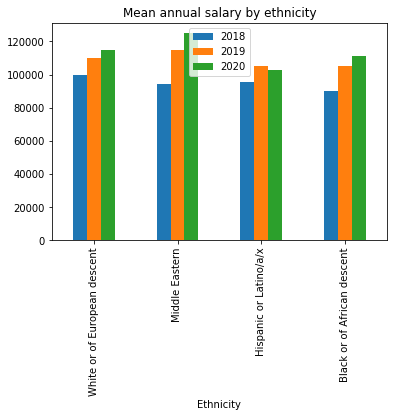

In [51]:
salary_by_ethny.plot(kind='bar', title='Mean annual salary by ethnicity')

In [52]:
years = salary_by_ethny.columns
for year in years:
    white_salary = salary_by_ethny.loc['White or of European descent'][year]
    for ethny in ethnicity_list20:
        diff = white_salary - salary_by_ethny.loc[ethny][year]
        print('Annual salary gap between White or of European descent and %s in %s: %s'%(ethny, year, diff))
    print('##################')

Annual salary gap between White or of European descent and White or of European descent in 2018: 0.0
Annual salary gap between White or of European descent and Hispanic or Latino/a/x in 2018: 4500.0
Annual salary gap between White or of European descent and Middle Eastern in 2018: 6000.0
Annual salary gap between White or of European descent and Black or of African descent in 2018: 10000.0
##################
Annual salary gap between White or of European descent and White or of European descent in 2019: 0.0
Annual salary gap between White or of European descent and Hispanic or Latino/a/x in 2019: 5000.0
Annual salary gap between White or of European descent and Middle Eastern in 2019: -5000.0
Annual salary gap between White or of European descent and Black or of African descent in 2019: 5000.0
##################
Annual salary gap between White or of European descent and White or of European descent in 2020: 0.0
Annual salary gap between White or of European descent and Hispanic or Lati

Here we are with more realistic salaries. Let's see the salaries by gender.

In [53]:
feature = {2018: 'Gender', 2019: 'Gender', 2020: 'Gender'}
gender_list = {
    'Man': {2018: 'Male', 2019: 'Man', 2020: 'Man'},
    'Woman': {2018: 'Female', 2019: 'Woman', 2020: 'Woman'},
    'Non-binary': {2018: 'Non-binary, genderqueer, or gender non-conforming', 2019: 'Non-binary, genderqueer, or gender non-conforming', 2020: 'Non-binary, genderqueer, or gender non-conforming'},
}

salary_by_gender = findings_by_feature(df_list, feature, gender_list, 'Gender', get_salary_by_years)
salary_by_gender

,2018,2019,2020
Gender,,,
Man,100000.0,113000.0,116800.0
Woman,85000.0,100000.0,104500.0
"Non-binary, genderqueer, or gender non-conforming",90000.0,101000.0,108000.0


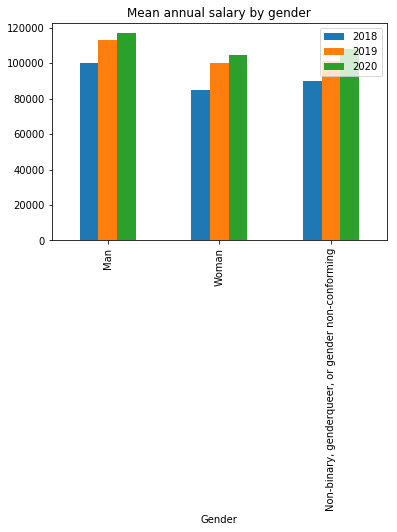

In [54]:
salary_by_gender.plot(kind='bar', title='Mean annual salary by gender')

In [55]:
years = salary_by_gender.columns
for year in years:
    men_salary = salary_by_gender.loc['Man'][year]
    for gender in gender_list20:
        diff = men_salary - salary_by_gender.loc[gender][year]
        print('Annual salary gap between Man and %s in %s: %s'%(gender, year, diff))
    print('##################')

Annual salary gap between Man and Man in 2018: 0.0
Annual salary gap between Man and Non-binary, genderqueer, or gender non-conforming in 2018: 10000.0
Annual salary gap between Man and Woman in 2018: 15000.0
##################
Annual salary gap between Man and Man in 2019: 0.0
Annual salary gap between Man and Non-binary, genderqueer, or gender non-conforming in 2019: 12000.0
Annual salary gap between Man and Woman in 2019: 13000.0
##################
Annual salary gap between Man and Man in 2020: 0.0
Annual salary gap between Man and Non-binary, genderqueer, or gender non-conforming in 2020: 8800.0
Annual salary gap between Man and Woman in 2020: 12300.0
##################


### Question 4: The US tech industry has been absorbing the minorities's labor?

One of the questions in Stackoverflow’s survey was related to the current employment status of the respondent.

In order to understand better if the tech industry has been absorbing the minorities’s labor, we need to understand the unemployment rate, i.e, people that are not employed, but are looking for work. Let's create a callback function to extract unemployment rate by ethnicity and gender.

In [56]:
def get_umployment_rate(df, year, feature):
    unemployment = df.query('Employment == "Not employed, but looking for work"')
    return unemployment.shape[0]/df.shape[0]

In [57]:
df_list = {2018: sample18, 2019: sample19, 2020: sample20}

feature = {2018: 'RaceEthnicity', 2019: 'Ethnicity', 2020: 'Ethnicity'}
unemployment_by_ethny = findings_by_feature(df_list, feature, minority_ethny_list, 'Ethnicity', get_umployment_rate)
unemployment_by_ethny

,2018,2019,2020
Ethnicity,,,
White or of European descent,0.038468,0.032923,0.021396
Middle Eastern,0.057692,0.053191,0.025773
Hispanic or Latino/a/x,0.059133,0.062899,0.034483
Black or of African descent,0.106017,0.067073,0.049296


In [59]:
extract_to_csv(unemployment_by_ethny)

Ethnicity;2018;2019;2020
White or of European descent;0,038467847769028875;0,03292349726775956;0,021395822720326033
Middle Eastern;0,057692307692307696;0,05319148936170213;0,02577319587628866
Hispanic or Latino/a/x;0,05913272010512484;0,06289881494986327;0,034482758620689655
Black or of African descent;0,10601719197707736;0,06707317073170732;0,04929577464788732



In [60]:
feature = {2018: 'Gender', 2019: 'Gender', 2020: 'Gender'}
unemployment_by_gender = findings_by_feature(df_list, feature, gender_list, 'Gender', get_umployment_rate)
unemployment_by_gender

,2018,2019,2020
Gender,,,
Man,0.042301,0.038464,0.021631
Woman,0.056197,0.059530,0.043860
"Non-binary, genderqueer, or gender non-conforming",0.075377,0.071895,0.026455


In [61]:
extract_to_csv(unemployment_by_gender)

Gender;2018;2019;2020
Man;0,04230078826192148;0,03846403742446885;0,02163141993957704
Woman;0,056197074672825253;0,05953002610966057;0,043859649122807015
"Non-binary; genderqueer; or gender non-conforming";0,07537688442211055;0,0718954248366013;0,026455026455026454



How much has the unemployment rate decreased in the last few years?

In [63]:
(unemployment_by_ethny[2018]-unemployment_by_ethny[2020])*100

Ethnicity
White or of European descent    1.707203
Middle Eastern                  3.191911
Hispanic or Latino/a/x          2.464996
Black or of African descent     5.672142
dtype: float64

In [64]:
(unemployment_by_gender[2018]-unemployment_by_gender[2020])*100

Gender
Man                                                  2.066937
Woman                                                1.233743
Non-binary, genderqueer, or gender non-conforming    4.892186
dtype: float64